In [73]:
import pandas as pd
import numpy as np

## Pre-Process Data

In [74]:
data = pd.read_csv("Netflix Titles.csv")
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [76]:
# Rows, Columns
data.shape

(5850, 15)

In [77]:
# Count Nulls
null = data.isnull().sum().sort_values(ascending=False)
print(null)

seasons                 3744
age_certification       2619
imdb_votes               498
imdb_score               482
imdb_id                  403
tmdb_score               311
tmdb_popularity           91
description               18
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64


In [78]:
# Replace Null Numbers With 0
nullNumbers = ["seasons", "imdb_votes", "imdb_score", "imdb_id", "tmdb_score", "tmdb_popularity"]
data[nullNumbers] = data[nullNumbers].fillna(0)
null = data.isnull().sum().sort_values(ascending=False)
print(null)

age_certification       2619
description               18
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64


In [79]:
# Replace Null Text With N/A
nullText = ["age_certification", "description", "title"]
data[nullText] = data[nullText].fillna("N/A")
null = data.isnull().sum().sort_values(ascending=False)
print(null)

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


In [80]:
# Count Duplicates
dup = data.duplicated().sum()
print(dup)

0


In [81]:
# Remove Columns
data.drop(["description", "production_countries"], axis=1, inplace=True)
data.head()

,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],1.0,0,0.0,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",0.0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",0.0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",0.0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,N/A,150,"['war', 'action']",0.0,tt0061578,7.7,72662.0,20.398,7.600


# Explore Data

<AxesSubplot:>

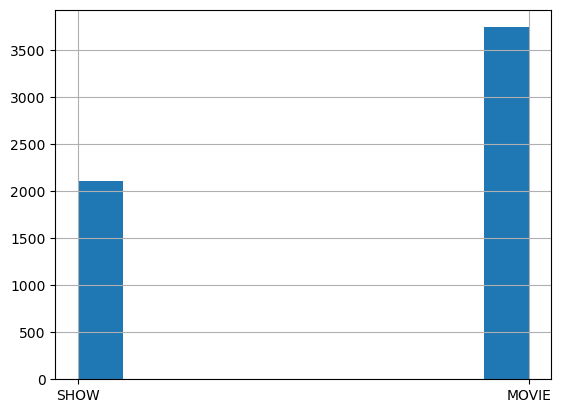

In [82]:
# Titles By Type
data["type"].hist()

<AxesSubplot:xlabel='release_year'>

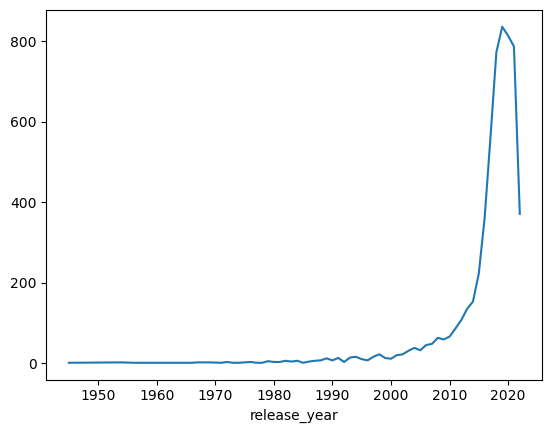

In [83]:
# Titles By Release Year
titleReleaseYear = data.groupby("release_year")["title"].count() 
titleReleaseYear.plot.line()